In [27]:
class PDBColumns:
    ATOM = 0
    ATOM_NUM = 1
    ATOM_TYPE = 2
    AMINO_ACID = 3
    RESIDUE_NUM = 5
    X = 6
    Y = 7
    Z = 8


def parse_line(line: str):
    parsed = [char for char in line.rstrip("\n").split(" ") if char != ""]
    return parsed


def one_model_read(pdb_file="../data/test.pdb"):
    with open(pdb_file) as infile:
        parsed = []
        for line in infile.readlines():
            d = parse_line(line)
            if len(d) >= 4 and d[PDBColumns.ATOM_TYPE] == "CA":
                amino_acid = d[PDBColumns.AMINO_ACID]
                loc = (
                    float(d[PDBColumns.X]),
                    float(d[PDBColumns.Y]),
                    float(d[PDBColumns.Z]),
                )
                parsed.append((amino_acid, loc))
        return parsed


one_model_read()[:10]

[('ASN', (-64.535, -2.678, 12.067)),
 ('CYS', (-61.344, -3.432, 9.96)),
 ('ASP', (-58.805, -2.018, 12.448)),
 ('SER', (-55.823, -1.57, 10.017)),
 ('ILE', (-52.999, -2.804, 12.231)),
 ('ARG', (-50.875, 0.342, 11.76)),
 ('LYS', (-47.783, -1.712, 12.584)),
 ('PRO', (-45.147, 0.823, 13.091)),
 ('SER', (-43.424, -2.159, 14.717)),
 ('HIS', (-41.227, -3.016, 11.786))]

In [2]:
from biopandas.pdb import PandasPdb
def carbon_alphas(pdb_file="../data/test.pdb"):
	ppdb = PandasPdb().read_pdb(pdb_file)
	df = ppdb.df["ATOM"]
	df_ca = df[df["atom_name"] == "CA"].sort_values(by="residue_number")
	return df_ca[["residue_name", "x_coord", "y_coord", "z_coord"]]
df_ca = carbon_alphas()

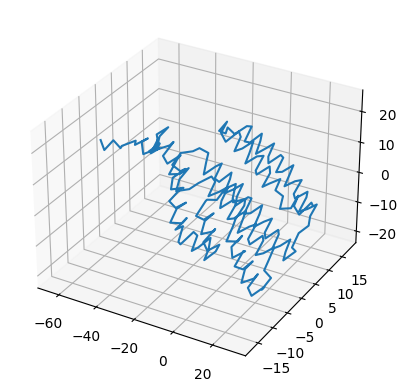

In [6]:
import matplotlib.pyplot as plt
def plot_3d(df_ca):
	ax = plt.figure().add_subplot(projection='3d')
	x = df_ca["x_coord"].tolist()
	y = df_ca["y_coord"].tolist()
	z = df_ca["z_coord"].tolist()
	return ax.plot(x, y, z)
plot_3d(df_ca)